<a href="https://colab.research.google.com/github/z5450851HimaMallina/z5450851_event_study/blob/main/MachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Business Objective
Develop and test various regression models on Dataset 1 with the objective to forecast insurance charges based on variables related to health and demographics. Using important performance criteria, the objective is to determine which model performs the best.

In [ ]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, median_absolute_error
from scipy.stats import randint
import matplotlib.pyplot as plt
import seaborn as sns
!pip install shap
import shap
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Load data
data = pd.read_csv('insurance.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Display information
data.info()
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


(1338, 7)

In [ ]:
# Check for missing values
print(data.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


###Exploratory Data Analysis

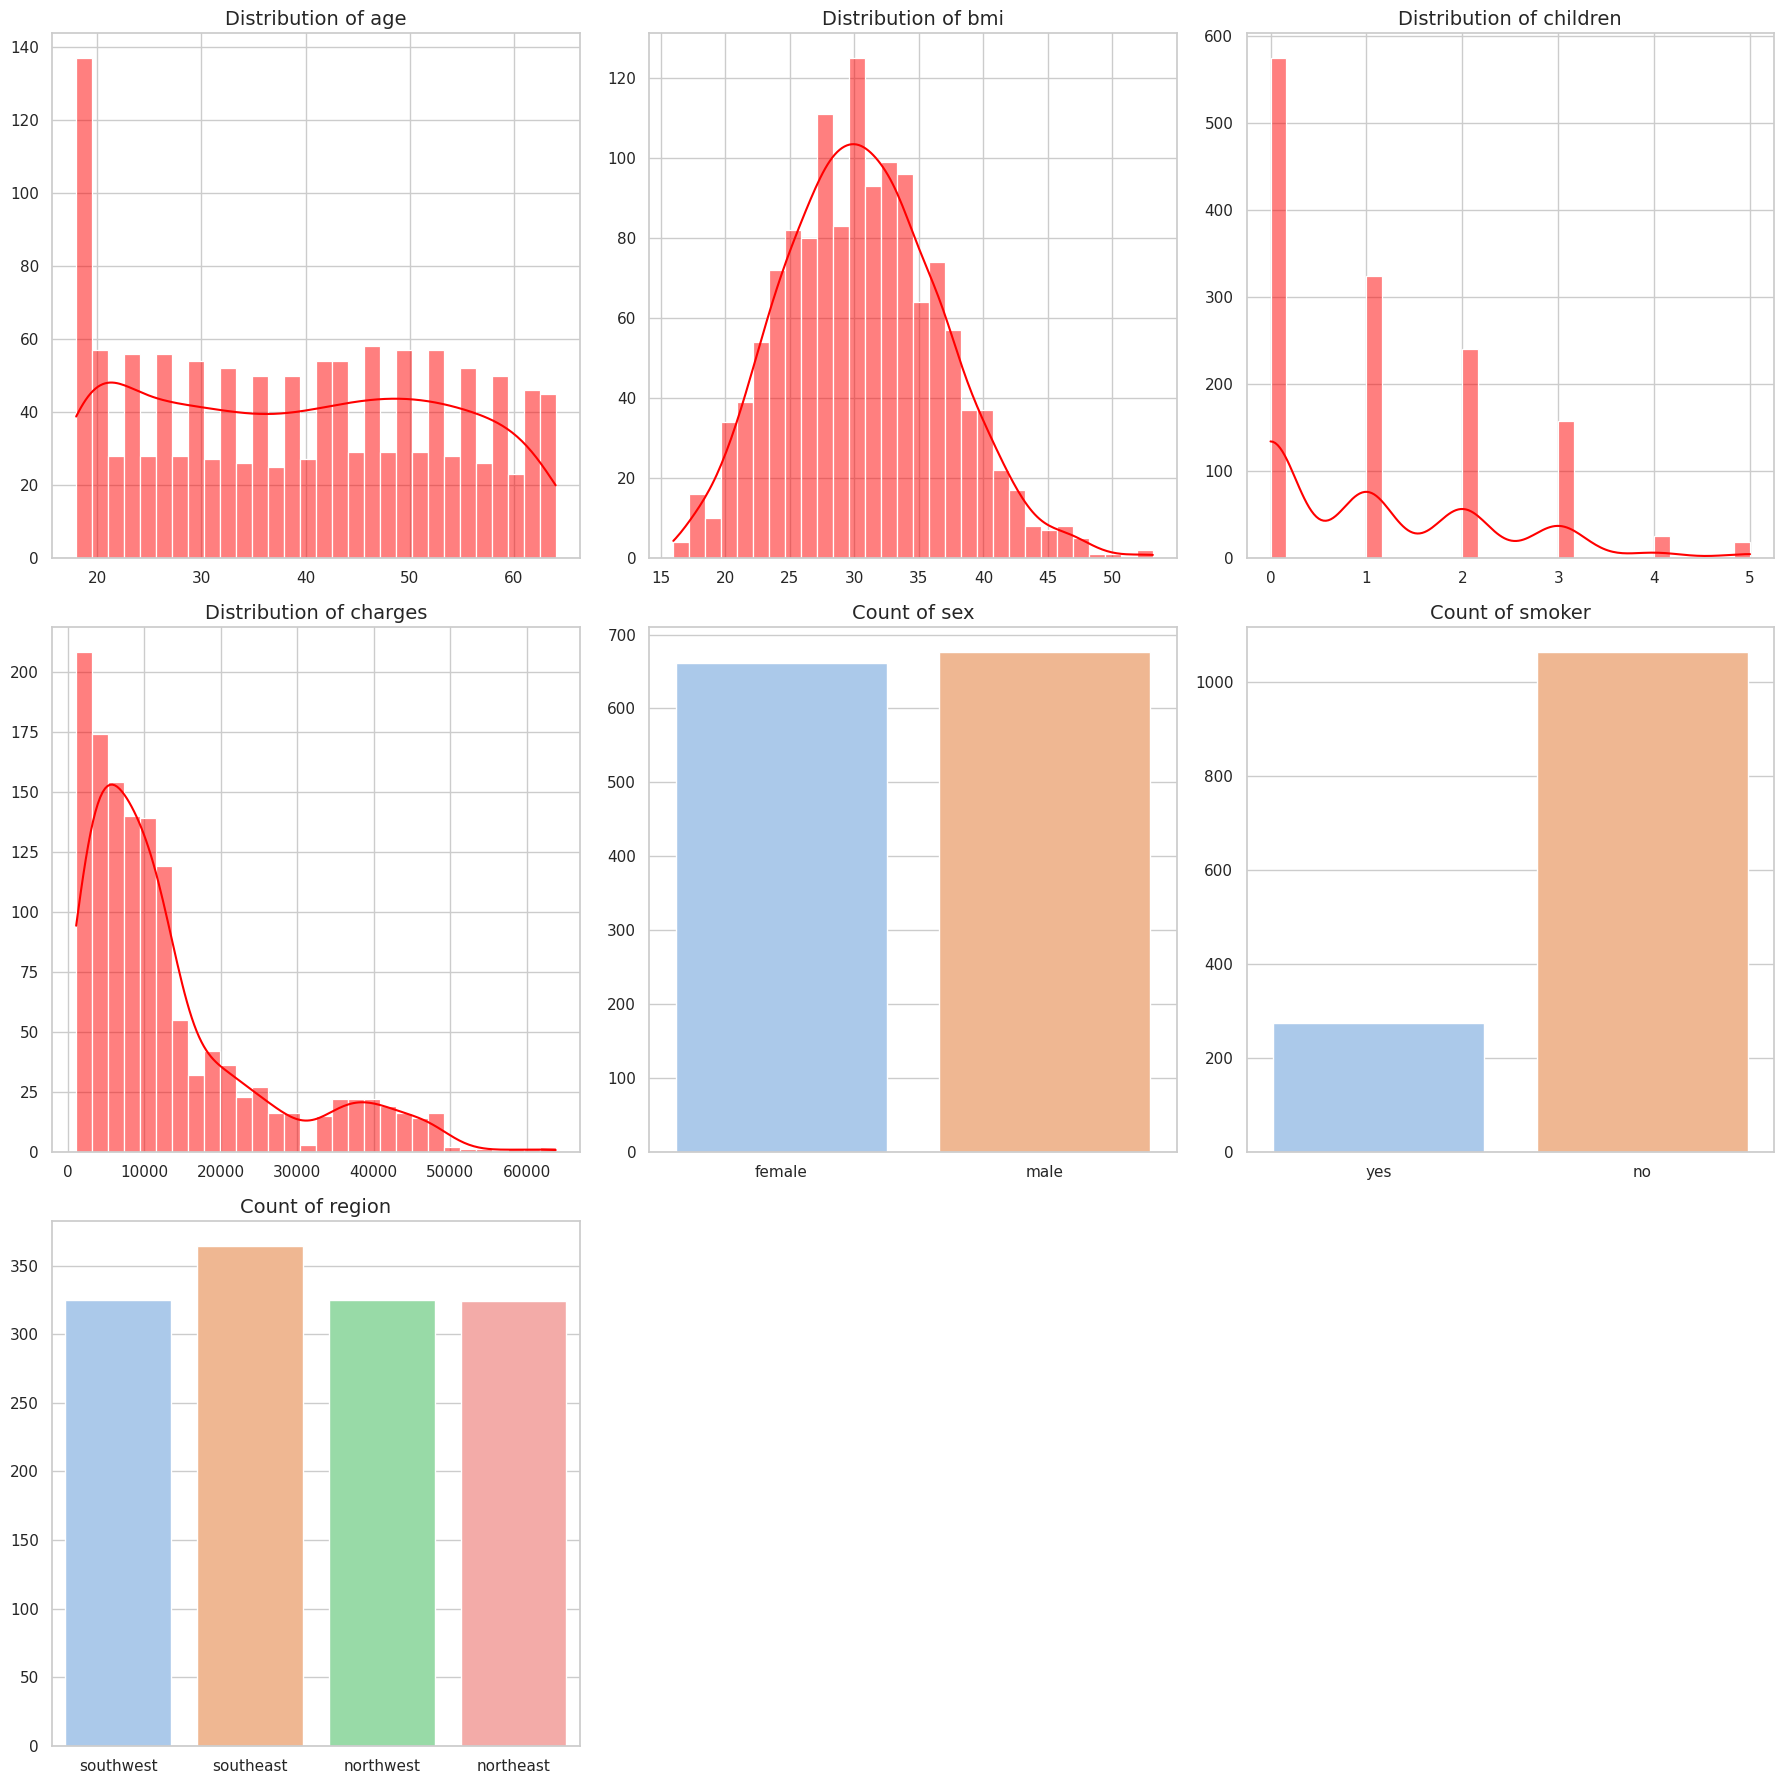

In [ ]:
#To understand the insurance dataset

sns.set(style="whitegrid")

# Define numerical and categorical features
numerical_features = ['age', 'bmi', 'children', 'charges']
categorical_features = ['sex', 'smoker', 'region']

# Create a combined figure with subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 18))

# Plot histograms for numerical features
for ax, feature in zip(axes.flatten()[:len(numerical_features)], numerical_features):
    sns.histplot(data[feature], bins=30, kde=True, ax=ax, color='red')
    ax.set_title(f'Distribution of {feature}', fontsize=14)
    ax.set_xlabel('')
    ax.set_ylabel('')

# Plots for categorical features
for ax, feature in zip(axes.flatten()[len(numerical_features):], categorical_features):
    sns.countplot(x=data[feature], ax=ax, palette='pastel')
    ax.set_title(f'Count of {feature}', fontsize=14)
    ax.set_xlabel('')
    ax.set_ylabel('')

# Remove empty subplots
for i in range(len(numerical_features) + len(categorical_features), 9):
    fig.delaxes(axes.flatten()[i])

# Adjust layout
plt.tight_layout()
plt.show()

###**Correlation Analysis**

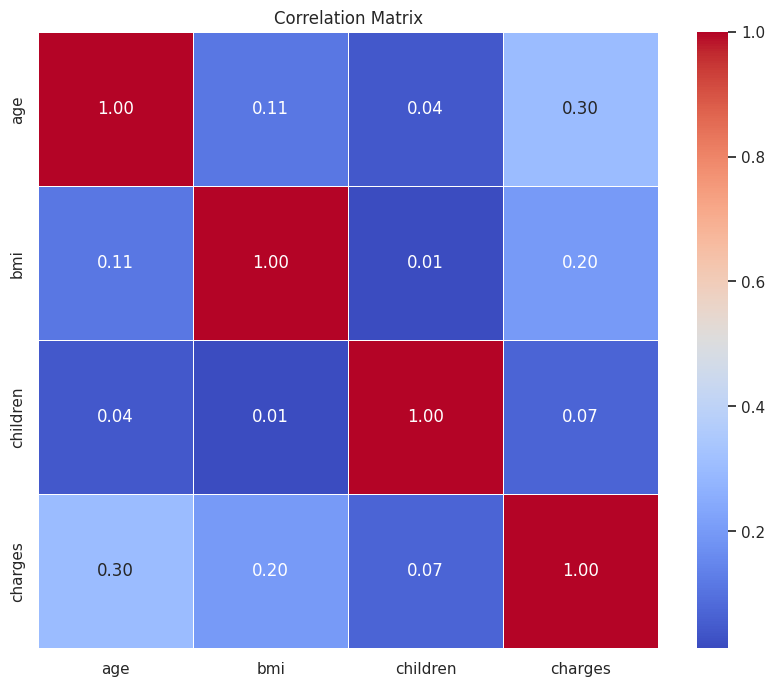

In [ ]:
s

Correlation Analysis Outcome:

	•	Age and charges (0.30):Moderate positive correlation.As age increases, the insurance charges tend to increase.
	•	BMI and charges (0.20):Weak positive correlation.Higher BMI values are slightly associated with higher insurance charges.
	•	Children and charges (0.07):Very weak positive correlation.The number of children has little to no effect on the insurance charges.
	•	Multicollinearity:No multicollinearity detected within features.

###Preprocessing


In [ ]:
# Preprocessing for numerical and categorical features
#Standardization of numerical features
#One-Hot Encoding of categorical features
numeric_features = ['age', 'bmi', 'children']
categorical_features = ['sex', 'smoker', 'region']

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Split data into training and test sets
X = data.drop('charges', axis=1)
y = data['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply preprocessing
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Introduce non-linear relationships into the model
# Create polynomial features
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)



NameError: name 'Pipeline' is not defined

###Developing Models

	•	Linear Regression Model
	•	Decision Tree Model
	•	Neural Network Model
	•	Random Forest Model
	•	Gradient Boosting Model

In [ ]:
# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'Neural Network': MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
}

# Train and evaluate models
results = {}

for model_name, model in models.items():
    # Train the model
    model.fit(X_train_poly, y_train)

    # Make predictions
    y_pred = model.predict(X_test_poly)

    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    median_ae = median_absolute_error(y_test, y_pred)

    # Store results
    results[model_name] = {
        'MSE': mse,
        'MAE': mae,
        'R²': r2,
        'Median AE': median_ae
    }

# Print results
for model_name, metrics in results.items():
    print("="*50)
    print(f"{model_name} - Mean Squared Error (MSE): {metrics['MSE']}")
    print(f"{model_name} - Mean Absolute Error (MAE): {metrics['MAE']}")
    print(f"{model_name} - R-squared (R²): {metrics['R²']}")
    print(f"{model_name} - Median Absolute Error: {metrics['Median AE']}")
    print("="*50)

Linear Regression - Mean Squared Error (MSE): 21164509.433659904
Linear Regression - Mean Absolute Error (MAE): 2743.8484048473247
Linear Regression - R-squared (R²): 0.8636735435433726
Linear Regression - Median Absolute Error: 1656.3354335106696
Decision Tree - Mean Squared Error (MSE): 43381659.243420206
Decision Tree - Mean Absolute Error (MAE): 3124.2840550895526
Decision Tree - R-squared (R²): 0.720566739408631
Decision Tree - Median Absolute Error: 558.5468250000001
Random Forest - Mean Squared Error (MSE): 21927650.050091308
Random Forest - Mean Absolute Error (MAE): 2667.8566594115996
Random Forest - R-squared (R²): 0.8587579438531308
Random Forest - Median Absolute Error: 1348.4165827500049
Gradient Boosting - Mean Squared Error (MSE): 20076820.238734633
Gradient Boosting - Mean Absolute Error (MAE): 2514.392111633668
Gradient Boosting - R-squared (R²): 0.8706796503532237
Gradient Boosting - Median Absolute Error: 1438.7828769638427
Neural Network - Mean Squared Error (MSE): 

###Model Performace Analysis

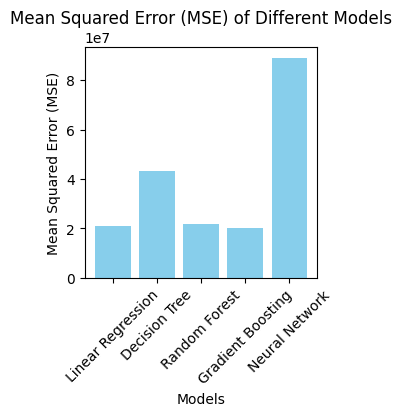

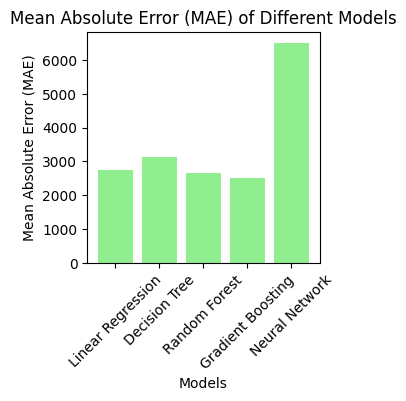

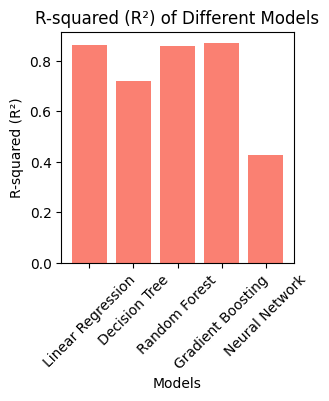

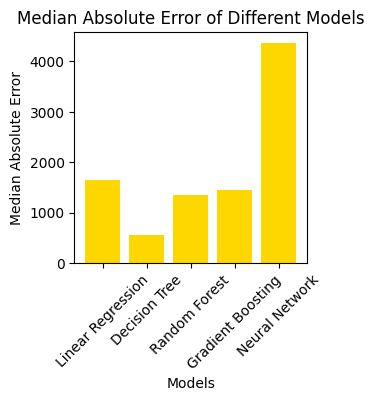

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the results
results = {
    'Linear Regression': {
        'MSE': 21164509.433659904,
        'MAE': 2743.8484048473247,
        'R²': 0.8636735435433726,
        'Median AE': 1656.3354335106696
    },
    'Decision Tree': {
        'MSE': 43381659.243420206,
        'MAE': 3124.2840550895526,
        'R²': 0.720566739408631,
        'Median AE': 558.5468250000001
    },
    'Random Forest': {
        'MSE': 21927650.050091308,
        'MAE': 2667.8566594115996,
        'R²': 0.8587579438531308,
        'Median AE': 1348.4165827500049
    },
    'Gradient Boosting': {
        'MSE': 20076820.238734633,
        'MAE': 2514.392111633668,
        'R²': 0.8706796503532237,
        'Median AE': 1438.7828769638427
    },
    'Neural Network': {
        'MSE': 88993133.33290614,
        'MAE': 6500.634242779495,
        'R²': 0.42677062493343587,
        'Median AE': 4369.066984536779
    }
}

# Extract metrics for plotting
models = list(results.keys())
mse_values = [results[model]['MSE'] for model in models]
mae_values = [results[model]['MAE'] for model in models]
r2_values = [results[model]['R²'] for model in models]
median_ae_values = [results[model]['Median AE'] for model in models]

# Plot Mean Squared Error (MSE)
plt.figure(figsize=(3, 3))
plt.bar(models, mse_values, color='skyblue')
plt.xlabel('Models')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Mean Squared Error (MSE) of Different Models')
plt.xticks(rotation=45)
plt.show()

# Plot Mean Absolute Error (MAE)
plt.figure(figsize=(3, 3))
plt.bar(models, mae_values, color='lightgreen')
plt.xlabel('Models')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Mean Absolute Error (MAE) of Different Models')
plt.xticks(rotation=45)
plt.show()

# Plot R-squared (R²)
plt.figure(figsize=(3, 3))
plt.bar(models, r2_values, color='salmon')
plt.xlabel('Models')
plt.ylabel('R-squared (R²)')
plt.title('R-squared (R²) of Different Models')
plt.xticks(rotation=45)
plt.show()

# Plot Median Absolute Error (Median AE)
plt.figure(figsize=(3, 3))
plt.bar(models, median_ae_values, color='gold')
plt.xlabel('Models')
plt.ylabel('Median Absolute Error')
plt.title('Median Absolute Error of Different Models')
plt.xticks(rotation=45)
plt.show()

Model Performance Summary

	•	: Gradient Boosting - Lowest MSE/MAE and highest R²
	•	2nd Best: Linear Regression - High R², low MAE
	•	Competitive: Random Forest - High R², slightly higher MSE/MAE; Neural Network - Needs tuning, high errors
	•	Least Performer: Decision Tree - Highest MSE/MAE



###Ranking from Top to least
	1.	Gradient Boosting
	2.	Linear Regression
	3.	Random Forest
	4.	Decision Tree
	5.	Artificial Neural Network

Recommended Next Steps (For team reference only)

	•	Tune hyperparameters: Focus on Gradient Boosting, Random Forest, and Neural Network.
	•	Apply cross-validation: Use k-fold (e.g., 5-fold) for robust evaluation.
	•	Ensemble models: Combine Gradient Boosting and Random Forest.
	•	Feature engineering: Explore additional transformations.
	•	Error analysis: Conduct residual analysis.

# Improved Random Forest

In [ ]:
#Improving Random Forest

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, median_absolute_error

# Define the parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Random Forest model
rf_model = RandomForestRegressor(random_state=42)

# Initialize GridSearchCV with the Random Forest model and parameter grid
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf,
                              cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=0)

# Fit GridSearchCV
grid_search_rf.fit(X_train_poly, y_train)

# Get the best estimator
best_rf_model = grid_search_rf.best_estimator_

# Make predictions with the best model
y_pred_rf = best_rf_model.predict(X_test_poly)

# Calculate metrics
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
median_ae_rf = median_absolute_error(y_test, y_pred_rf)

# Print results
print("="*50)
print("Best Random Forest Model - Hyperparameters:", grid_search_rf.best_params_)
print(f"Best Random Forest Model - Mean Squared Error (MSE): {mse_rf}")
print(f"Best Random Forest Model - Mean Absolute Error (MAE): {mae_rf}")
print(f"Best Random Forest Model - R-squared (R²): {r2_rf}")
print(f"Best Random Forest Model - Median Absolute Error: {median_ae_rf}")
print("="*50)

NameError: name 'X_train_poly' is not defined

In [ ]:
##Feature Importance of Ramdom Forest

import numpy as np
import matplotlib.pyplot as plt

def aggregate_feature_importance(feature_importances, feature_names):
    # Aggregate feature importances for the main columns
    aggregated_importance = {key: 0 for key in ['age', 'sex', 'bmi', 'children', 'smoker', 'region']}

    for importance, feature in zip(feature_importances, feature_names):
        if 'age' in feature:
            aggregated_importance['age'] += importance
        elif 'sex' in feature:
            aggregated_importance['sex'] += importance
        elif 'bmi' in feature:
            aggregated_importance['bmi'] += importance
        elif 'children' in feature:
            aggregated_importance['children'] += importance
        elif 'smoker' in feature:
            aggregated_importance['smoker'] += importance
        elif 'region' in feature:
            aggregated_importance['region'] += importance

    return aggregated_importance

def plot_feature_importance(model, model_name, feature_names):
    if hasattr(model, 'feature_importances_'):
        # Tree-based models (Random Forest)
        feature_importances = model.feature_importances_
    else:
        raise ValueError(f"Model {model_name} does not have feature importances.")

    # Aggregate feature importances
    aggregated_importance = aggregate_feature_importance(feature_importances, feature_names)

    # Plot aggregated feature importances
    plt.figure(figsize=(10, 6))
    plt.title(f"Aggregated Feature Importance for {model_name}", fontsize=16)
    plt.barh(range(len(aggregated_importance)), list(aggregated_importance.values()), color='skyblue', edgecolor='black')
    plt.yticks(range(len(aggregated_importance)), list(aggregated_importance.keys()), fontsize=12)
    plt.xlabel("Feature Importance", fontsize=14)
    plt.grid(axis='x')
    plt.show()

# Combine original and polynomial feature names
original_feature_names = numeric_features + list(preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_features))
poly_feature_names = poly.get_feature_names_out(original_feature_names)

# Plot feature importances for the best Random Forest model
plot_feature_importance(best_rf_model, 'Random Forest', poly_feature_names)

In [ ]:
def plot_actual_vs_predicted(y_test, y_pred, model_name):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, color='blue', edgecolors='k', alpha=0.6)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'Actual vs. Predicted Values for {model_name}', fontsize=16)
    plt.grid(True)
    plt.show()

# Generate scatter plot for Random Forest model
plot_actual_vs_predicted(y_test, y_pred_rf, 'Random Forest')

Actual vs Predicted plot

Close Alignment: The majority of the data points are close to the red diagonal line, indicating that the predictions are generally accurate and align well with the actual values.

Hence,This suggests that the Random Forest Model is effective at predicting insurance charges.

In [ ]:
def plot_residuals_vs_predicted(y_test, y_pred, model_name):
    residuals = y_test - y_pred
    plt.figure(figsize=(10, 6))
    plt.scatter(y_pred, residuals, color='blue', edgecolors='k', alpha=0.6)
    plt.axhline(y=0, color='r', linestyle='--', linewidth=2)
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title(f'Residuals vs. Predicted Values for {model_name}', fontsize=16)
    plt.grid(True)
    plt.show()

# Generate residuals plot for Random Forest model
plot_residuals_vs_predicted(y_test, y_pred_rf, 'Random Forest')

Residuals vs Predicted plot

The residuals are mostly centered around the red horizontal line at y=0, which is a good sign showcasing that the Random Forest model does not have a significant bias in overpredicting or underpredicting insurance charges.

Observations:
1) Model can be improved to handle high-cost cases more effectively
2) Addressing heteroscedasticity could improve model performance
3) Customer segmentation can be done based on their predicted charges and residuals to identify groups with different risk profiles.







Key Takeaways from Random Forest Model

	•	Health-Related Factors: BMI and smoking hoabits are the most influential in predicting insurance charges as per random forest model. This highlights the importance of lifestyle choices and health metrics in determining insurance costs.
	•	Demographics: Age and the number of children also play significant roles but are less influential when compared to health-related factors.
	•	Gender and Location: Gender and geographical location have some impact but are less impactful in the prediction compared to other factors.

These insights can help insurance companies focus on the most impactful factors like health when determining insurance premiums and can also support individuals to promote healthy lifestyle choices.


Business Recommendations and Strategies

1)Personalized Health Plans based on customer segemtation and provide preventive care
2)Use of Technology and Analytics like machine learning to continously moniter,predict and update insurance changes
3)Educational Initiatives workshops to inform customers about the effect of health metrics, lifestyle on insurance changes.
4)Run Gender based health relatived campaigns to promote awareness.


# Improve Neural Network

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neural_network import MLPRegressor
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFECV
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('insurance.csv')

# Print the first few rows and data info to understand its structure
print(data.head())
print(data.info())


   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


In [ ]:
# Preprocess the data
# Convert categorical variables to numeric
data['sex'] = data['sex'].map({'female': 0, 'male': 1})
data['smoker'] = data['smoker'].map({'no': 0, 'yes': 1})

# One-hot encode the 'region' column
region_dummies = pd.get_dummies(data['region'], prefix='region')
data = pd.concat([data, region_dummies], axis=1)
data.drop('region', axis=1, inplace=True)


In [ ]:
# Split the data into features (X) and target (y)
X = data.drop(['charges'], axis=1)
y = data['charges']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Perform feature selection
rf = RandomForestRegressor(n_estimators=100, random_state=42)
selector = RFECV(estimator=rf, step=1, cv=5)
selector = selector.fit(X_train, y_train)
selected_features = X_train.columns[selector.support_].tolist()

# Use only selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

In [ ]:
# corrected version
# Define the parameter grid for GridSearchCV
param_grid = {
    'mlp__hidden_layer_sizes': [(5,), (25,), (50,), (10, 10), (50, 50), (100, 100), (5, 5, 5), (20, 20, 20), (50, 50, 50), (100, 100, 100)],
    'mlp__activation': ['relu'],
    'mlp__alpha': [0.0001, 0.001, 0.01],
    'mlp__learning_rate': ['constant', 'adaptive'],
    'mlp__max_iter': [200, 500, 1000],
}

# Create the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', MLPRegressor(random_state=42))
])

# Perform GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('mlp', MLPRegressor(random_state=42))]),
             n_jobs=-1,
             param_grid={'mlp__activation': ['relu'],
                         'mlp__alpha': [0.0001, 0.001, 0.01],
                         'mlp__hidden_layer_sizes': [(5,), (25,), (50,),
                                                     (10, 10), (50, 50),
                                                     (100, 100), (5, 5, 5),
                                                     (20, 20, 20), (50, 50, 50),
                                                     (100, 100, 100)],
                         'mlp__learning_rate': ['constant', 'adaptive'],
                         'mlp__max_iter': [200, 500, 1000]},
             scoring='neg_mean_squared_error')

In [ ]:
# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the model on the test set
y_pred = best_model.predict(X_test_selected)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
median_ae = median_absolute_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Median Absolute Error: {median_ae}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared Score: {r2}")


ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- region_southwest


In [ ]:
# Print selected features
print("Selected features:", selected_features)

In [ ]:
# Plot feature importances
importances = selector.estimator_.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(len(importances)), importances[indices])
plt.xticks(range(len(importances)), [selected_features[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
# Plot predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.tight_layout()
plt.show()


In [ ]:
# Plot residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values")
plt.axhline(y=0, color='r', linestyle='--')
plt.tight_layout()
plt.show()

In [ ]:
# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(best_model.loss_curve_)
plt.title('Learning Curve')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()

# **Improved Gradient Boosting Regressor model**


Hyperparameter for gradient boosting

In [ ]:
# Define a more refined parameter grid for hyperparameter tuning
param_grid = {
    "n_estimators": [300, 400, 500, 600],
    "max_depth": [3, 4, 5],
    "min_samples_split": [4, 5, 6],
    "learning_rate": [0.03, 0.05, 0.07],
    "subsample": [0.85, 0.9, 0.95]
}


In [ ]:
# Initialize the Gradient Boosting Regressor
gbr = GradientBoostingRegressor(random_state=42)

# Initialize GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best model from the grid search
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Parameters from Grid Search:")
print(best_params)

In [ ]:
# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
median_ae = median_absolute_error(y_test, y_pred)

In [ ]:
print("\nEvaluation of the Best Gradient Boosting Regressor Model on Test Set:")
print("---------------------------------------------------------------")
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))
print("The root mean squared error (RMSE) on test set: {:.4f}".format(rmse))
print("The mean absolute error (MAE) on test set: {:.4f}".format(mae))
print("The R-squared (R²) on test set: {:.4f}".format(r2))
print("The median absolute error (MedAE) on test set: {:.4f}".format(median_ae))
print("---------------------------------------------------------------")

In [ ]:
# Initial model results for comparison
initial_results = {
    'MSE': 20076820.238734633,
    'MAE': 2514.392111633668,
    'R²': 0.8706796503532237,
    'Median AE': 1438.7828769638427
}

# Compare the performance
print("\nInitial Model Results:")
for metric, value in initial_results.items():
    print(f"{metric}: {value}")

print("\nComparison:")
improved = {
    'MSE': mse < initial_results['MSE'],
    'MAE': mae < initial_results['MAE'],
    'R²': r2 > initial_results['R²'],
    'Median AE': median_ae < initial_results['Median AE']
}
for metric, value in improved.items():
    print(f"{metric} Improved: {value}")

In [ ]:
## Feature Importance of Gradient Boosting

def aggregate_feature_importance(feature_importances, feature_names):
    # Aggregate feature importances for the main columns
    aggregated_importance = {key: 0 for key in ['age', 'sex', 'bmi', 'children', 'smoker', 'region']}

    for importance, feature in zip(feature_importances, feature_names):
        if 'age' in feature:
            aggregated_importance['age'] += importance
        elif 'sex' in feature:
            aggregated_importance['sex'] += importance
        elif 'bmi' in feature:
            aggregated_importance['bmi'] += importance
        elif 'children' in feature:
            aggregated_importance['children'] += importance
        elif 'smoker' in feature:
            aggregated_importance['smoker'] += importance
        elif 'region' in feature:
            aggregated_importance['region'] += importance

    return aggregated_importance

def plot_feature_importance(model, model_name, feature_names):
    if hasattr(model, 'feature_importances_'):
        # Tree-based models (Gradient Boosting)
        feature_importances = model.feature_importances_
    else:
        raise ValueError(f"Model {model_name} does not have feature importances.")

    # Aggregate feature importances
    aggregated_importance = aggregate_feature_importance(feature_importances, feature_names)

    # Plot aggregated feature importances
    plt.figure(figsize=(10, 6))
    plt.title(f"Aggregated Feature Importance for {model_name}", fontsize=16)
    plt.barh(range(len(aggregated_importance)), list(aggregated_importance.values()), color='skyblue', edgecolor='black')
    plt.yticks(range(len(aggregated_importance)), list(aggregated_importance.keys()), fontsize=12)
    plt.xlabel("Feature Importance", fontsize=14)
    plt.grid(axis='x')
    plt.show()

# Combine feature names
feature_names = X.columns.tolist()

# Plot feature importances for the best Gradient Boosting model
plot_feature_importance(best_model, 'Gradient Boosting', feature_names)

# Permutation Importance
result = permutation_importance(best_model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()

plt.figure(figsize=(10, 6))
plt.boxplot(result.importances[sorted_idx].T, vert=False, labels=np.array(X.columns)[sorted_idx])
plt.title("Permutation Importance (test set)")
plt.show()


In [ ]:
# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, edgecolor='k', alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values')
plt.show()

# Decision Tree

In [ ]:
import pandas as pd

#load data into a data frame
insurance = pd.read_csv("insurance.csv")
insurance

In [ ]:
#prepare X and Y
X = insurance.drop('charges', axis=1)
Y = insurance['charges']

#convert categorical variables to dummy variables
X = pd.get_dummies(X, drop_first=True)

display(X)
display(Y)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt

#split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=12345)

#create and train the decision tree regressor model
reg = DecisionTreeRegressor(random_state=0)
reg.fit(X_train, Y_train)

#plot Decision Tree
fig = plt.figure(figsize=(25,20))
_ = plot_tree(reg, feature_names=X_train.columns.tolist(), filled=True)
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

#predict on the test set
Y_pred = reg.predict(X_test)

#calculate the metrics
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, Y_pred)

#check metrics
print(f"Mean Squared Error (MSE) before Pruning: {mse}")
print(f"Root Mean Squared Error (RMSE) before Pruning: {rmse}")
print(f"R-squared (R²) before Pruning: {r2}")

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

#define the parameter grid for the regressor
param_grid = {
    'max_depth': list(range(10, 31, 10)),
    'min_samples_split': list(range(5, 11)),
    'min_samples_leaf': list(range(2, 11)),
    'min_impurity_decrease': np.arange(1, 5) / 1000
}

#initialize the regressor
reg = DecisionTreeRegressor(random_state=12345)

#initialize GridSearchCV
gcv = GridSearchCV(estimator=reg, param_grid=param_grid, cv=5)
gcv.fit(X_train, Y_train)

#print the best parameters
print("Best parameters found by GridSearchCV:", gcv.best_params_)

In [ ]:
#train the final model with the best parameters
reg_best = DecisionTreeRegressor(**gcv.best_params_, random_state=12345)
reg_best.fit(X_train, Y_train)

#plot the final decision tree
fig = plt.figure(figsize=(25, 20))
_ = plot_tree(reg_best, feature_names=X_train.columns.tolist(), filled=True)
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

#predict on the test set
Y_pred_pruned_best = reg_best.predict(X_test)

#calculate and print the metrics
mse_pruned_optimal = mean_squared_error(Y_test, Y_pred_pruned_best)
rmse_pruned_optimal = np.sqrt(mse_pruned_optimal)
r2_pruned_optimal = r2_score(Y_test, Y_pred_pruned_best)

print(f"MSE after Pruning: {mse_pruned_optimal}")
print(f"RMSE after Pruning: {rmse_pruned_optimal}")
print(f"R-squared (R²) after Pruning: {r2_pruned_optimal}")

In [ ]:
#get feature importances from the final pruned model
feature_importances = reg_best.feature_importances_
feature_names = X_train.columns

#create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print(importance_df)

In [ ]:
from sklearn.inspection import PartialDependenceDisplay

#plot partial dependence for important features
important_features = importance_df['Feature'].head(5).tolist()  #top 5 features for demonstration
fig, ax = plt.subplots(figsize=(14, 8))
display = PartialDependenceDisplay.from_estimator(reg_best, X_train, features=important_features, ax=ax)
plt.show()